# 03 Initializer
## 맨 땅에 이니셜라이저 코드

In [32]:
import tensorflow as tf
tf.reset_default_graph()

#아래 중 한가지 골라서 시작하면 되는데, 그에 따라 밑에 코드들의 결과값도 다르게 나올 것.
#특정 constant로 시작. 0이나 1을 집어넣어도 되지만, 밑의 코드들을 이용해도 된다!
init_w = tf.keras.initializers.constant(7.0) #tensor에서는 안 잡힙니다.
#1로 시작
#init_w = tf.keras.initializers.ones
#0으로 시작
#init_w = tf.keras.initializers.zeros
#identity matrix로 시작. identity는 조금 복잡하게 만든다!
#init_w = tf.keras.initializers.identity


w = tf.get_variable('w', (3, 5), dtype=tf.float32, initializer=init_w) #(3, 5)는 shape

init = tf.global_variables_initializer() #session 밖에서 정의. 이 initializer와 밑의 sess.run이 필요.
    
with tf.Session() as sess:
    sess.run(init) #이게 없어도 에러 뜸
    w_run = sess.run(w)
print(w_run)
print(w)

[[7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]]
<tf.Variable 'w:0' shape=(3, 5) dtype=float32_ref>


In [33]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops :
    print(op.name)

w/Initializer/Const
w
w/Assign
w/read
init


In [34]:
for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("w/Initializer/Const:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


## initializer code

<tf.Variable 'w:0' shape=(100, 100) dtype=float32_ref>
<class 'numpy.ndarray'>
(100, 100)
float32


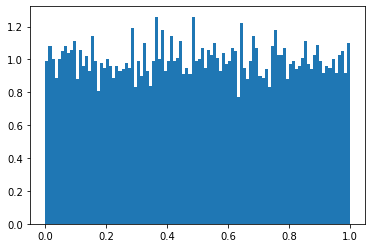

0.4998497 0.28825888


In [35]:
%matplotlib inline 
#python에서는 빼줘야 함. jupyther에 특화된 것. object print 방지.

import tensorflow as tf; tf.reset_default_graph()
import matplotlib.pyplot as plt
import numpy as np #reshape을 위해 필요

#Random Normal. default는 mean=0, std=0.05. seed 고정하면 같은 변수들로 돌리게 됨.
#init_w = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=3) 
#Truncated Normal. 분포를 자름(truncation).
#init_w = tf.keras.initializers.TruncatedNormal() # mean=0, (before_truncation_)std=0.05
#Random Uniform
init_w = tf.keras.initializers.RandomUniform(minval=0., maxval=1.) # minval=-0.05, maxval=0.05
w = tf.get_variable('w', (100,100), tf.float32, init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(w) #w자체가 tensor라서 tensor가 print 
    w_run = sess.run(w)
    print(type(w_run)) #(100, 100)이니까 너무 커서 일단 type이나 shape 등만 print
    print(w_run.shape) 
    print(w_run.dtype)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())

In [26]:
for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("w/Initializer/Const:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


In [27]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

#Orthogonal. 따로 Seed 설정하지 않으면 숫자는 계속 바뀜
init_w = tf.keras.initializers.Orthogonal()
w = tf.get_variable('w', (3,5), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
    
print(w_run)
print(w_run.shape)

[[-0.08808136 -0.13145593  0.62632406  0.49630162 -0.57996875]
 [ 0.00628205  0.49005553  0.04692848 -0.6300631  -0.60052013]
 [ 0.38919994  0.17652452 -0.65625834  0.47490966 -0.40143275]]
(3, 5)


In [28]:
for i in range(3):
    for j in range(3):
        print(np.abs(np.sum(w_run[i]*w_run[j])))

0.9999999
2.9802322e-08
5.9604645e-08
2.9802322e-08
1.0000001
2.9802322e-08
5.9604645e-08
2.9802322e-08
1.0


In [29]:
total_sum = 0
for i in range(3):
    for j in range(3):
        total_sum += np.abs(np.sum(w_run[i]*w_run[j]))
print(total_sum)

3.000000238418579


In [48]:
#(5, 3)라면?
tf.reset_default_graph()

init_w = tf.keras.initializers.Orthogonal()
w = tf.get_variable('w', (5, 3), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
            
total_sum = 0
for i in range(3):
    for j in range(3):
        total_sum += np.abs(np.sum(w_run[: , i]*w_run[: , j]))
print(total_sum)

3.0000006295740604


## Xavier Initializers

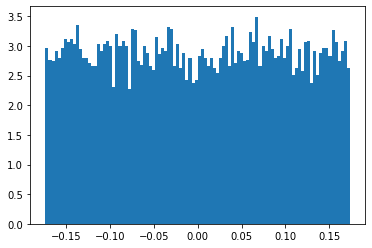

-0.000324577 0.10028527
0.17320508075688773


In [52]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.reset_default_graph()

#glorot_normal
#init_w = tf.keras.initializers.glorot_normal()
#glorot_uniform
init_w = tf.keras.initializers.glorot_uniform()
w = tf.get_variable('w', (100,100), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())
print(np.sqrt(3/((100+100)/2)))

## He Initializers

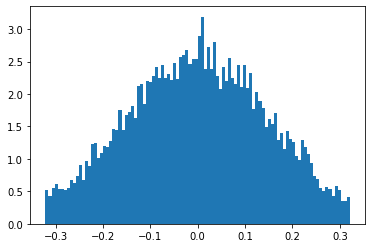

-0.00093557703 0.14191523
0.1414213562373095


In [53]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)
init = tf.keras.initializers.he_normal()
w = tf.get_variable('w', (100,100), dtype=tf.float32, initializer=init)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    w_run = sess.run(w)
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())
print(np.sqrt(2/100))

## VarianceScaling Initializers

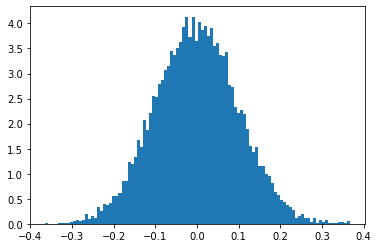

In [57]:
%matplotlib inline
import tensorflow as tf ; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

#default는 truncated normal
#init_w = tf.keras.initializers.VarianceScaling()
#잘리지 않은 그냥 normal로 하려면
#init_w = tf.keras.initializers.VarianceScaling(distribution = 'untruncated_normal')
w = tf.get_variable('w', (100,100), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)

plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()

In [58]:
for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("w/Initializer/Const:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


## tf.layers module

In [60]:
import tensorflow as tf
import numpy as np

#internet에서 MNIST data download. tuple 형식으로 받아야 함.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [61]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [65]:
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype) #unsigned int?

uint8 uint8 uint8 uint8


In [66]:
print(np.min(x_train), np.max(x_train))

0 255


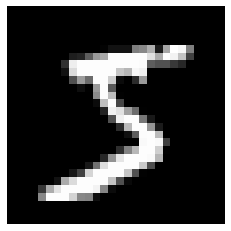

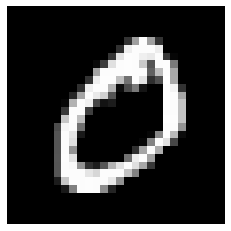

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(2) :
    plt.imshow(x_train[i], cmap='gray') #image show
    plt.axis('off')
    plt.show()

In [68]:
#normalize
x_train = x_train.astype(np.float32).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [74]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [75]:
lr = 0.01
epoch = 20
batch_size = 200
threshold = 1.0

In [76]:
n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
y = tf.placeholder(tf.int32, shape=(None), name="y")

hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.relu, name="hidden1")
logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

In [77]:
g = tf.get_default_graph()
ops = g.get_operations()

for op in ops :
    for tensor in op.outputs :
        print(tensor)
        
#결과값의 kernel은 weight에 해당.
#output은 activation(relu 같은 것)을 따로 지정하지 않아서 default로 아무것도 작용되지 않음.

Tensor("x:0", shape=(?, 784), dtype=float32)
Tensor("y:0", dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/shape:0", shape=(2,), dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/min:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/max:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/RandomUniform:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/sub:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/mul:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel:0", shape=(784, 300), dtype=float32_ref)
Tensor("hidden1/kernel/Assign:0", shape=(784, 300), dtype=float32_ref)
Tensor("hidden1/kernel/read:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/bias/Initializer/zeros:0", shape=(300,), dtype=float32)
Tensor("hidden1/bias:0", shape=(300,), dtyp

## tf.assign
### 특정한 값을 initializer로 지정

In [78]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

In [79]:
n_inputs = 2
n_hidden1 = 3

In [81]:
#그냥 tuple이든 numpy array든 상관 없음.
original_w = np.array([[1., 2., 3.], [4., 5., 6.]]) # Load the weights from the other framework
original_b = np.array([7., 8., 9.])                 # Load the biases from the other framework

In [82]:
x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
hidden1 = tf.layers.dense(x, n_hidden1, name="hidden1")

In [83]:
g = tf.get_default_graph()
ops = g.get_operations()

for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("x:0", shape=(?, 2), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/shape:0", shape=(2,), dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/min:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/max:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/RandomUniform:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/sub:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/mul:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel:0", shape=(2, 3), dtype=float32_ref)
Tensor("hidden1/kernel/Assign:0", shape=(2, 3), dtype=float32_ref)
Tensor("hidden1/kernel/read:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/bias/Initializer/zeros:0", shape=(3,), dtype=float32)
Tensor("hidden1/bias:0", shape=(3,), dtype=float32_ref)
Tensor("hidden1/bias/Assign:0", shape=(3,)

위에 나와있는 Assign:0 부분을 다른 것(우리가 지정하는 것)으로 바꿔주고 싶은 것!

In [84]:
tf.get_collection('trainable_variables')

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

In [85]:
g = tf.get_default_graph()

#tensor 이름을 새로 지정
w = g.get_tensor_by_name('hidden1/kernel:0')
b = g.get_tensor_by_name('hidden1/bias:0')

w_placeholder = tf.placeholder(tf.float32, shape=(n_inputs, n_hidden1))
b_placeholder = tf.placeholder(tf.float32, shape=n_hidden1)

#tf.assign(tensor, value) : tensor에 value를 assign
assign_w = tf.assign(w, w_placeholder)
assign_b = tf.assign(b, b_placeholder)

#같이 보기
original_w = np.array([[1., 2., 3.], [4., 5., 6.]])
original_b = np.array([7., 8., 9.])                 

In [86]:
init = tf.global_variables_initializer() 

In [88]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run([w, b]))
    feed_dict={w_placeholder: original_w, b_placeholder: original_b}
    sess.run([assign_w, assign_b], feed_dict=feed_dict)
    print(sess.run([w, b]))

[array([[ 0.28660715,  0.60481167, -0.5636793 ],
       [-0.97108173,  0.41022336,  1.0767782 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32), array([7., 8., 9.], dtype=float32)]


## get tensor by name

In [89]:
g = tf.get_default_graph()
w = g.get_tensor_by_name('hidden1/kernel:0')
b = g.get_tensor_by_name('hidden1/bias:0')

init_w = g.get_operation_by_name("hidden1/kernel/Assign").inputs[1]
init_b = g.get_operation_by_name("hidden1/bias/Assign").inputs[1]

In [90]:
init = tf.global_variables_initializer() 

In [91]:
with tf.Session() as sess:
    #sess.run(init)
    feed_dict={w_placeholder: original_w, b_placeholder: original_b}
    sess.run([assign_w, assign_b], feed_dict=feed_dict)
    print(sess.run([w, b]))

[array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32), array([7., 8., 9.], dtype=float32)]
